In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import math


C:\Users\Puc\AppData\Roaming\Python\Python313\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


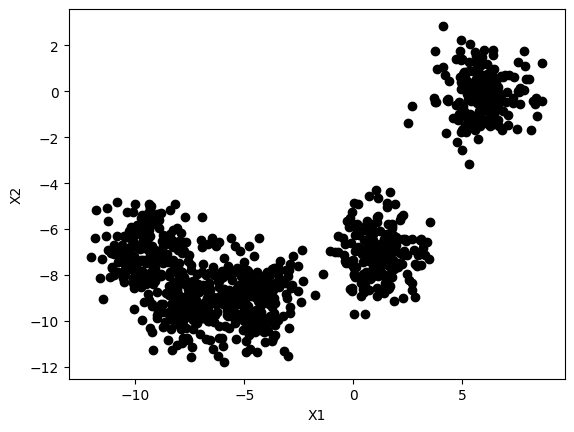

In [9]:
data, lx = make_blobs(n_samples=1000, n_features=2, centers=5)
plt.scatter(data[:,0],data[:,1], marker='o', color="black")
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

In [3]:
def dist(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

epoch: 1

7475.270214719586
epoch: 2

3032.681980484408
epoch: 3

2715.4465122287825
epoch: 4

2652.1410705734324
epoch: 5

2625.5395696106266
epoch: 6

2614.1318553440237
epoch: 7

2611.6491263976977
epoch: 8

2608.046916023143
epoch: 9

2601.998353242916
epoch: 10

2597.602354487988
epoch: 11

2596.702773893023
epoch: 12

2596.2911156359514
epoch: 13

2596.207288660879
epoch: 14

2595.9432495969995
epoch: 15

2595.668707649112
epoch: 16

2595.5045915308356
epoch: 17

2595.447081777575
epoch: 18

2595.447081777575
epoch: 19

2595.447081777575
epoch: 20

2595.447081777575
epoch: 21

2595.447081777575
epoch: 22

2595.447081777575
epoch: 23

2595.447081777575
epoch: 24

2595.447081777575
epoch: 25

2595.447081777575
epoch: 26

2595.447081777575
epoch: 27

2595.447081777575
epoch: 28

2595.447081777575
epoch: 29

2595.447081777575
epoch: 30

2595.447081777575
epoch: 31

2595.447081777575
epoch: 32

2595.447081777575
epoch: 33

2595.447081777575
epoch: 34

2595.447081777575
epoch: 35

2595

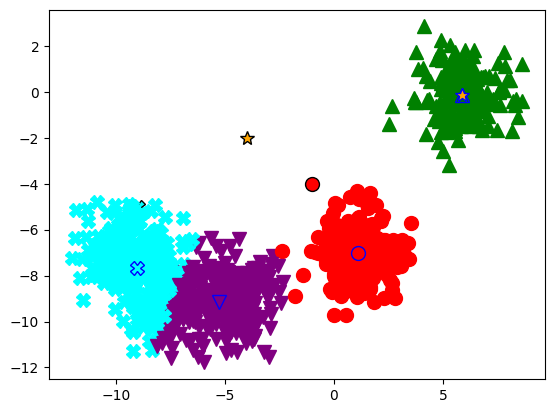

In [15]:
# plt.scatter(data[:,0],data[:,1], marker='o', color="black")
# plt.xlabel('X1')
# plt.ylabel('X2')

markers = ['o', 'v', '^', '*', 'X']
colors = ['red', 'purple', 'green', 'orange','cyan']

n_clusters = 5
max_epoch = 100

x = np.random.choice(range(int(data[:, 0].min()), int(data[:, 0].max())), size=(n_clusters), replace=False).astype(float)
y = np.random.choice(range(int(data[:, 1].min()), int(data[:, 1].max())), size=(n_clusters), replace=False).astype(float)

for i in range(len(x)):
    plt.plot(x[i], y[i], marker=markers[i], color=colors[i], markersize=10, markeredgewidth=1, markeredgecolor='black')

epoch = 0
cluster = list(np.zeros(1000))
flag = 1
while flag and epoch<max_epoch:
    epoch += 1
    erro = 0 
    flag = 0
    
    print(f"epoch: {epoch}\n")
    for i in range(len(data)):
        nearest = -1
        mindist = float('inf')
        currpnt = [data[i, 0], data[i, 1]]
        for j in range(len(x)):
            currcnt = [x[j], y[j]]
            currdist = dist(currcnt, currpnt)
            if mindist > currdist:
                mindist = currdist
                nearest = j
        cluster[i] = nearest 
        erro += mindist**2
    
    
    sumsx=list(np.zeros(n_clusters))
    sumsy=list(np.zeros(n_clusters))
    totals=list(np.zeros(n_clusters))
    for i in range(len(cluster)):
        sumsx[cluster[i]]=sumsx[cluster[i]]+data[i,0]
        sumsy[cluster[i]]=sumsy[cluster[i]]+data[i,1]
        totals[cluster[i]]=totals[cluster[i]]+1

    for i in range(len(totals)):
        if totals[i]==0:
            x[i],y[i] = np.random.randint(-15, 15, size=2)
            flag = 1
        else:
            dx=float(sumsx[i])/totals[i]
            dy=float(sumsy[i])/totals[i]

        if abs(x[i]-dx) > 0.001 or abs(y[i]-dy) > 0.001: flag=1
        
        x[i]=dx
        y[i]=dy

    print(erro)

for i in range(len(data)):
    plt.plot(data[i, 0], data[i, 1], marker=markers[cluster[i]], color=colors[cluster[i]], markersize=10)

for i in range(len(x)):
    plt.plot(x[i], y[i], marker=markers[i], color=colors[i], markersize=10, markeredgewidth=1, markeredgecolor='blue')

plt.show()